In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import random
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [61]:
df = pd.read_csv('flag.data')
df.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language',
              'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
              'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
              'saltries', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
              'animate', 'text', 'topleft', 'botright']

In [62]:
religion_map = {0: 'Catholic', 1: 'Other Christian', 
                2: 'Muslim', 3: 'Buddhist', 
                4: 'Hindu', 5: 'Ethnic', 
                6: 'Marxist', 7: 'Others'}

In [63]:
df['religion'] = df['religion'].replace(religion_map)

In [64]:
df.head(5)

name  landmass  zone  area  population  language  \
0         Albania         3     1    29           3         6   
1         Algeria         4     1  2388          20         8   
2  American-Samoa         6     3     0           0         1   
3         Andorra         3     1     0           0         6   
4          Angola         4     2  1247           7        10   

          religion  bars  stripes  colours  ...  saltries  quarters  sunstars  \
0          Marxist     0        0        3  ...         0         0         1   
1           Muslim     2        0        3  ...         0         0         1   
2  Other Christian     0        0        5  ...         0         0         0   
3         Catholic     3        0        3  ...         0         0         0   
4           Ethnic     0        2        3  ...         0         0         1   

   crescent  triangle  icon  animate text  topleft  botright  
0         0         0     0        1    0      red       red  
1         1         0     0        0    0    green     white  
2         0         1     1        1    0     blue       red  
3         0         0     0        0    0     blue       red  
4         0         0     1        0    0      red     black  

[5 rows x 30 columns]

In [65]:
def mostrar_distribuicao_por_coluna(coluna):
    coluna_freq = coluna.value_counts()
    
    plt.figure(figsize=(5, 4))
    coluna_freq.plot(kind='bar', color='skyblue')
    plt.ylabel("Frequência")
    plt.show()

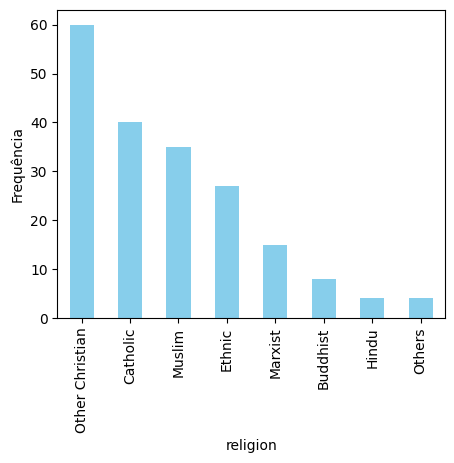

In [66]:
mostrar_distribuicao_por_coluna(df['religion']) # frequência das religiões

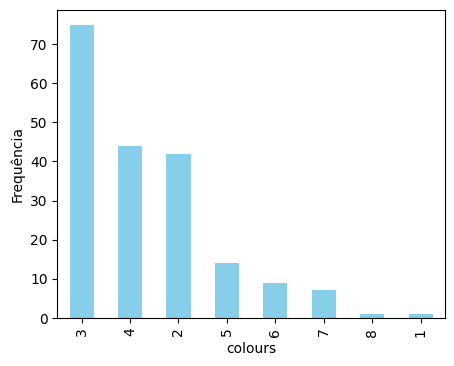

In [67]:
mostrar_distribuicao_por_coluna(df['colours'])  # numero de cores distintas na bandeira

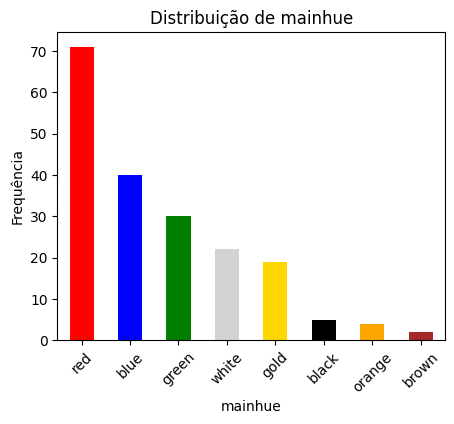

In [68]:
def mostrar_distribuicao_com_cor(coluna):
    cor_mapeamento = {
    'red': 'red',
    'blue': 'blue',
    'green': 'green',
    'gold': 'gold',
    'orange': 'orange',
    'black': 'black',
    'brown': 'brown',
    'white': 'lightgray'
}
    
    coluna_freq = coluna.value_counts()
    cores = [cor_mapeamento.get(cor, 'skyblue') for cor in coluna_freq.index]
    
    # Plotando o gráfico de barras
    plt.figure(figsize=(5, 4))
    coluna_freq.plot(kind='bar', color=cores)
    plt.xlabel(coluna.name)
    plt.ylabel("Frequência")
    plt.title(f"Distribuição de {coluna.name}")
    plt.xticks(rotation=45)
    plt.show()

mostrar_distribuicao_com_cor(df['mainhue'])   # Distribuição de cores nas bandeiras

In [69]:
inserir = {'Ethnic': 'Others', 'Marxist': 'Others', 'Buddhist': 'Others', 'Hindu': 'Others'}

df['religion'] = df['religion'].replace(inserir)

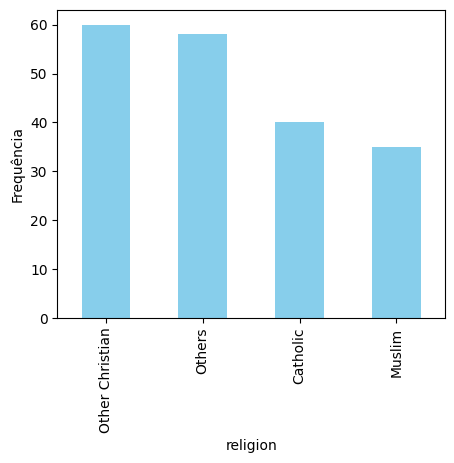

In [70]:
mostrar_distribuicao_por_coluna(df['religion'])

In [71]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Estudo das Bandeiras')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [72]:
df['area'].describe()

count      193.000000
mean       700.316062
std       2176.570790
min          0.000000
25%          9.000000
50%        111.000000
75%        463.000000
max      22402.000000
Name: area, dtype: float64

In [73]:
discretizacao = pd.cut(df['area'], bins=3)
df['area'] = pd.cut(df['area'], bins=3, labels=["1", "2", "3"])

for i, intervalo in enumerate(discretizacao.cat.categories):
    print(f"Faixa {i+1}: {intervalo.left} a {intervalo.right}")

Faixa 1: -22.402 a 7467.333
Faixa 2: 7467.333 a 14934.667
Faixa 3: 14934.667 a 22402.0


In [74]:
discretizacao = pd.cut(df['population'], bins=3)
df['population'] = pd.cut(df['population'], bins=3, labels=["1", "2", "3"])

for i, intervalo in enumerate(discretizacao.cat.categories):
    print(f"Faixa {i+1}: {intervalo.left} a {intervalo.right}")

Faixa 1: -1.008 a 336.0
Faixa 2: 336.0 a 672.0
Faixa 3: 672.0 a 1008.0


In [75]:
df['mainhue'].value_counts()

mainhue
red       71
blue      40
green     30
white     22
gold      19
black      5
orange     4
brown      2
Name: count, dtype: int64

In [76]:
mapa_cores = {
    'red': 1,
    'blue': 2,
    'green': 3,
    'white': 4,
    'gold': 5,
    'black': 6,
    'orange': 7,
    'brown': 8}

df['mainhue'] = df['mainhue'].map(mapa_cores)

In [77]:
df.head()

name  landmass  zone area population  language         religion  \
0         Albania         3     1    1          1         6           Others   
1         Algeria         4     1    1          1         8           Muslim   
2  American-Samoa         6     3    1          1         1  Other Christian   
3         Andorra         3     1    1          1         6         Catholic   
4          Angola         4     2    1          1        10           Others   

   bars  stripes  colours  ...  saltries  quarters  sunstars  crescent  \
0     0        0        3  ...         0         0         1         0   
1     2        0        3  ...         0         0         1         1   
2     0        0        5  ...         0         0         0         0   
3     3        0        3  ...         0         0         0         0   
4     0        2        3  ...         0         0         1         0   

   triangle  icon  animate  text  topleft  botright  
0         0     0        1     0      red       red  
1         0     0        0     0    green     white  
2         1     1        1     0     blue       red  
3         0     0        0     0     blue       red  
4         0     1        0     0      red     black  

[5 rows x 30 columns]

In [78]:
X = df[['landmass', 'zone', 'area', 'population', 'language',
       'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltries', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text']]

y = df['religion']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
max_acuracia = 0
seed_salva = 0
possiveis_parametros = None

param_grid = {
    'n_estimators': [20, 50, 100],         # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],        # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],        # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],         # Número mínimo de amostras em cada folha
    'criterion': ['gini', 'entropy', 'log_loss']
}


for i in range(10):
    seed = random.randint(0, 100000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    modelo = RandomForestClassifier(random_state=seed)
    
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    
    # Avaliando o modelo
    acuracia = accuracy_score(y_test, y_pred)
    print(f"{i} --- acc: {acuracia:.6f}   seed: {seed}", end='\r')
    
    if acuracia > max_acuracia:
        seed_salva = seed
        max_acuracia = acuracia
        possiveis_parametros = grid_search.best_params_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_salva)
modelo = RandomForestClassifier(**possiveis_parametros, random_state=seed_salva)

scores = cross_val_score(modelo, X, y, cv=5)
modelo.fit(X_train, y_train)
print(max_acuracia)

print("\nRelatório de Classificação:")
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

print(f"\nAcurácias da validação cruzada: {scores}")
print(f"Média da acurácia: {np.mean(scores):.6f} +/- {np.std(scores):.6f}")

matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

KeyboardInterrupt: 